# Цель работы
Освоить методы решения задач линейного программирования с использованием различных библиотек Python и графического метода.

# Задачи:
1. Решить ЗЛП на минимум и максимум методами:

Библиотека pulp

Библиотека scipy.optimize

Библиотека cvxopt

2. Построить графическое решение с областью допустимых значений и оптимальными точками.

3. Сравнить результаты, время работы и точность разных методов.

# Импортируем необходимые библиотеки.

# Задача 3
$$y - x → min,max$$
$$y ≥ 0$$
$$x + y ≤ 1$$
$$x - 4y ≥ -2$$

Ответ: x = -2; y = 0

Нахождение максимума целевой функции с использованием библиотеки pulp

In [13]:
from pulp import *
import time

start = time.time()

x = LpVariable("x", lowBound=None)  # x может быть отрицательным
y = LpVariable("y", lowBound=0)     # y ≥ 0

problem = LpProblem('0', LpMaximize)

problem += y - x, "Функция цели"

problem += x + y <= 1, "1"
problem += x - 4*y >= -2, "2"

problem.solve()

print("Результат:")
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)

print("Максимальная разность y-x:")
print(value(problem.objective))

stop = time.time()
print("Время:")
print(stop - start)

Результат:
x = -2.0
y = 0.0
Максимальная разность y-x:
2.0
Время:
0.02153325080871582


Нахождение минимума целевой функции с использованием библиотеки pulp

In [14]:
from pulp import *
import time

start = time.time()

x = LpVariable("x", lowBound=None)
y = LpVariable("y", lowBound=0)

problem = LpProblem('0', LpMinimize)

problem += y - x, "Функция цели"

problem += x + y <= 1, "1"
problem += x - 4*y >= -2, "2"

problem.solve()

print("Результат:")
for variable in problem.variables():
    print(variable.name, "=", variable.varValue)

print("Минимальная разность y-x:")
print(value(problem.objective))

stop = time.time()
print("Время:")
print(stop - start)

Результат:
x = 1.0
y = 0.0
Минимальная разность y-x:
-1.0
Время:
0.008800029754638672


Нахождение максимума целевой функции с использованием библиотеки cvxopt

In [19]:
from cvxopt import matrix, solvers
import time

start = time.time()

# Целевая функция: максимизировать y - x = -x + y
# В CVXOPT минимизируется c^T * x, поэтому для максимума меняем знак
# максимизировать -x + y = минимизировать x - y

c = matrix([1.0, -1.0])  # коэффициенты для [x - y]

# Ограничения неравенства: G*x <= h
# 1) x + y <= 1  => x + y <= 1
# 2) x - 4y >= -2 => -x + 4y <= 2
G = matrix([[-1.0, -1.0],
            [-1.0, 4.0]])
h = matrix([1.0, 2.0])

# Ограничения равенства: A*x = b (нет ограничений равенства)
A = matrix(0.0, (0, 2))
b = matrix(0.0, (0, 1))

# Решаем задачу
sol = solvers.lp(c, G, h, A, b)

print("Результат (CVXOPT):")
print("x =", sol['x'][0])
print("y =", sol['x'][1])
print("Максимальная разность y-x:")
print(-sol['primal objective'])  # меняем знак обратно

stop = time.time()
print("Время:")
print(stop - start)

Optimal solution found.
Результат (CVXOPT):
x = -1.1999999999999997
y = 0.20000000000000007
Максимальная разность y-x:
1.4
Время:
0.0034046173095703125


Нахождение минимума целевой функции с использованием библиотеки cvxopt

In [24]:
from cvxopt import matrix, solvers
import time

start = time.time()

c = matrix([-1.0, 1.0])

G = matrix([[1.0, 1.0],
            [-1.0, 4.0]])
h = matrix([1.0, 2.0])

A = matrix(0.0, (0, 2))
b = matrix(0.0, (0, 1))

sol = solvers.lp(c, G, h, A, b)

print("Результат:")
print("x =", sol['x'][0])
print("y =", sol['x'][1])
print("Минимальная разность y-x:")
print(sol['primal objective'])

stop = time.time()
print("Время:")
print(stop - start)

Optimal solution found.
Результат:
x = 1.1999999999999997
y = 0.20000000000000007
Минимальная разность y-x:
-0.9999999999999997
Время:
0.0014753341674804688


Нахождение максимума целевой функции с использованием библиотеки scipy.optimize

In [21]:
from scipy.optimize import linprog
import time
import numpy as np

start = time.time()

# Для удобства также поменяем знак
c = [1.0, -1.0]  # минимизировать x - y

# Ограничения неравенства: A_ub * x <= b_ub
# 1) x + y <= 1
# 2) x - 4y >= -2 => -x + 4y <= 2
A_ub = [[1.0, 1.0],
        [-1.0, 4.0]]
b_ub = [1.0, 2.0]

# Границы переменных
# x не ограничен снизу/сверху, y >= 0
bounds = [(None, None), (0, None)]

# Решаем задачу
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

print("Результат (SciPy):")
print("x =", result.x[0])
print("y =", result.x[1])
print("Максимальная разность y-x:")
print(-result.fun)  # меняем знак обратно

stop = time.time()
print("Время:")
print(stop - start)

Результат (SciPy):
x = -2.0
y = 0.0
Максимальная разность y-x:
2.0
Время:
0.060753822326660156


Нахождение минимума целевой функции с использованием библиотеки scipy.optimize

In [22]:
from scipy.optimize import linprog
import time
import numpy as np

start = time.time()

c = [-1.0, 1.0]

A_ub = [[1.0, 1.0],
        [-1.0, 4.0]]
b_ub = [1.0, 2.0]

bounds = [(None, None), (0, None)]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

print("Результат:")
print("x =", result.x[0])
print("y =", result.x[1])
print("Минимальная разность y-x:")
print(result.fun)

stop = time.time()
print("Время:")
print(stop - start)

Результат:
x = 1.0
y = 0.0
Минимальная разность y-x:
-1.0
Время:
0.004709482192993164


# Графики

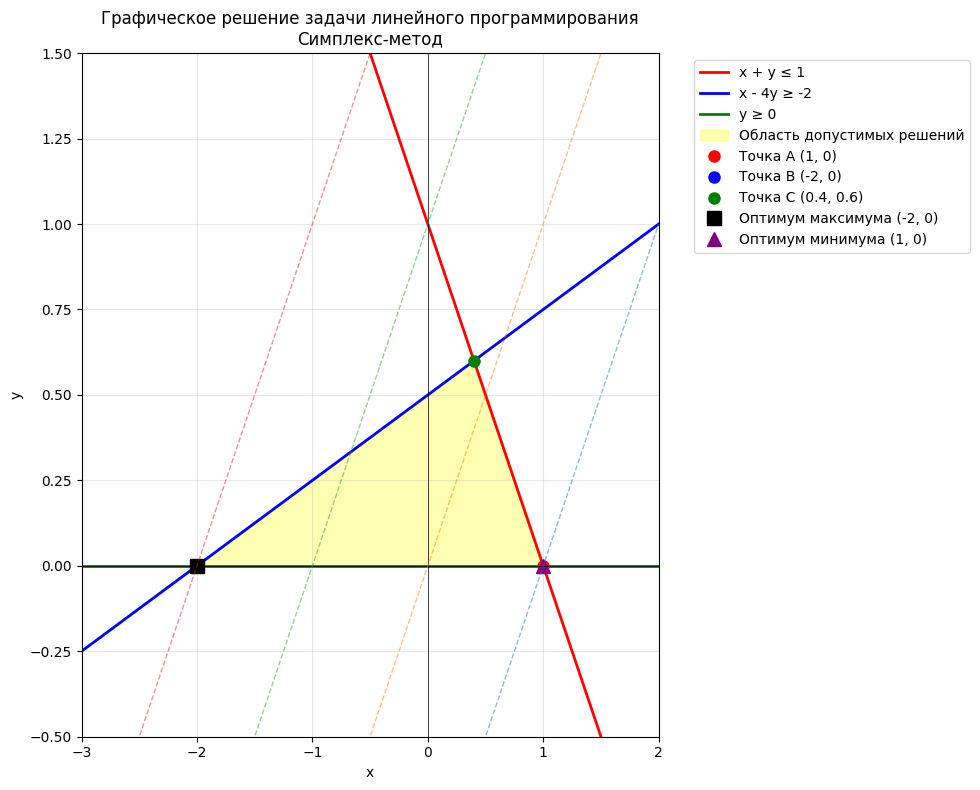

Значения целевой функции F = y - x в угловых точках:
Точка A (1, 0): F = -1 = -1
Точка B (-2, 0): F = 2 = 2
Точка C (0.4, 0.6): F = 0.19999999999999996 = 0.2

Максимум: F = 2 в точке (-2, 0)
Минимум: F = -1 в точке (1, 0)


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Определяем ограничения
x = np.linspace(-3, 2, 400)

# Ограничение 1: x + y <= 1 => y <= 1 - x
y1 = 1 - x

# Ограничение 2: x - 4y >= -2 => -4y >= -2 - x => y <= (x + 2)/4
y2 = (x + 2) / 4

# Ограничение 3: y >= 0
y3 = np.zeros_like(x)

# Находим точки пересечения
# Точка A: пересечение y=0 и x + y = 1
A = (1, 0)

# Точка B: пересечение y=0 и x - 4y = -2
B = (-2, 0)

# Точка C: пересечение x + y = 1 и x - 4y = -2
# Решаем систему:
# x + y = 1
# x - 4y = -2
# Вычитаем: 5y = 3 => y = 0.6, x = 0.4
C = (0.4, 0.6)

# Создаем график
plt.figure(figsize=(10, 8))

# Рисуем ограничения
plt.plot(x, y1, 'r-', linewidth=2, label='x + y ≤ 1')
plt.plot(x, y2, 'b-', linewidth=2, label='x - 4y ≥ -2')
plt.axhline(y=0, color='g', linewidth=2, label='y ≥ 0')

# Закрашиваем область допустимых решений
# Область: y >= 0, y <= 1 - x, y <= (x + 2)/4
y_upper = np.minimum(y1, y2)
plt.fill_between(x, y3, y_upper, where=(y_upper >= y3), alpha=0.3, color='yellow', label='Область допустимых решений')

# Отмечаем угловые точки
points = [A, B, C]
labels = ['A', 'B', 'C']
colors = ['red', 'blue', 'green']

for i, (px, py) in enumerate(points):
    plt.plot(px, py, 'o', markersize=8, color=colors[i], label=f'Точка {labels[i]} ({px}, {py})')

# Отмечаем оптимальное решение для максимума
plt.plot(-2, 0, 's', markersize=10, color='black', label='Оптимум максимума (-2, 0)')

# Отмечаем оптимальное решение для минимума
plt.plot(1, 0, '^', markersize=10, color='purple', label='Оптимум минимума (1, 0)')

# Настраиваем график
plt.xlim(-3, 2)
plt.ylim(-0.5, 1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графическое решение задачи линейного программирования\nСимплекс-метод')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Добавляем линии уровня для целевой функции
# Целевая функция: F = y - x
for level in [-1, 0, 1, 2]:
    # y - x = level => y = x + level
    y_level = x + level
    plt.plot(x, y_level, '--', alpha=0.5, linewidth=1, label=f'y - x = {level}')

plt.tight_layout()
plt.show()

# Выводим значения целевой функции в угловых точках
print("Значения целевой функции F = y - x в угловых точках:")
print(f"Точка A (1, 0): F = {0 - 1} = -1")
print(f"Точка B (-2, 0): F = {0 - (-2)} = 2")
print(f"Точка C (0.4, 0.6): F = {0.6 - 0.4} = 0.2")
print(f"\nМаксимум: F = 2 в точке (-2, 0)")
print(f"Минимум: F = -1 в точке (1, 0)")

# Вывод
Была решена задача нахождения минимума и максимума при помощи библиотек pulp, scipy.Optimize, cvxopt. Проанализировав работу этих библиотек и сравнив результат, мы можем сделать вывод, что для точных вычислений рекомендуется использовать PuLP или SciPy.optimize, при этом PuLP предпочтительнее благодаря более простому синтаксису.

Для высокопроизводительных задач где скорость критична, лучше подходит CVXOPT, несмотря на некоторую потерю точности.